# Breast Cancer Dataset Analysis



 __The goal of this dataset is to train a model so that it predicts whether a person is likely to suffer from breast cancer (whether the probability is above or below 50%): however, in this exercise/project. we are simply going to observe and analyse the distrubtion of the data,search  for outlier and missing values and asses the relationship between features.__

## Challenge Objectives

In this challenge, you will work with a csv file that contains a risk estimation dataset for breast cancer. The data dictionary is also provided for the format of the dataset used in this challenge. The original dataset is partitioned into training, provisional and final testing datasets, in which the training dataset contains the column “cancer” indicating the actual breast cancer result (0 = no & 1 = yes).

Note: "Data collection and sharing was supported by the National Cancer Institute-funded Breast Cancer Surveillance Consortium (HHSN261201100031C). You can learn more about the BCSC at: http://www.bcsc-research.org/. Data for this study was obtained from the BCSC: http://bcsc-research.org/."

###  Importing necessary libraries📚

In [1]:

# import libaries
import pandas as pd
import numpy as np
from pandas import set_option
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")
 #treatment of the outlier
from scipy import stats
import numpy as np
# Normalization
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score
from sklearn.metrics import matthews_corrcoef


In [2]:
# To load the dataset into jupyter notebook
train=pd.read_csv("data-training.csv")
test=pd.read_csv("data-provisional.csv")

In [3]:
# to load the first 5 set of the data
train.head()

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0000001,0,1,1,1,0,1,0,0,0,9,9,9,0,0,2
1,RE-TRAIN-0000002,0,1,1,1,0,1,0,0,0,9,9,9,0,0,4
2,RE-TRAIN-0000003,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1
3,RE-TRAIN-0000004,0,1,1,1,0,1,0,1,0,9,9,9,0,0,1
4,RE-TRAIN-0000005,0,1,1,1,0,1,1,0,0,0,9,9,0,0,2


In [4]:
test.head()

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,count
0,RE-PROV-0000001,0,1,1,1,0,1,0,0,0,0,9,9,0,4
1,RE-PROV-0000002,0,1,1,1,0,2,0,1,0,9,9,9,0,1
2,RE-PROV-0000003,0,1,1,1,0,2,9,0,0,0,9,9,0,4
3,RE-PROV-0000004,0,1,1,1,0,2,9,1,0,0,9,9,0,2
4,RE-PROV-0000005,0,1,1,1,0,3,2,0,0,9,9,9,0,3


### Information about each features

id=  Identifier of the row

Menopaus= 0 = premenopausal; 1 = postmenopausal or age>=55 ; 9 = unknown

agegrp = 1 = 35-39; 2 = 40-44; 3 = 45-49; 4 = 50-54; 5 = 55-59; 6 = 60-64; 7 = 65-69; 8 = 70-74; 9 = 75-79; 10 = 80-84

density = BI-RADS breast density codes 1 = Almost entirely fat; 2 = Scattered fibroglandular densities; 3 = Heterogeneously dense;
		 4 = Extremely dense; 9 = Unknown or different measurement system

race = 1 = white; 2 = Asian/Pacific Islander; 3 = black; 4 = Native American; 5 = other/mixed; 9 = unknown

Hispanic = 0 = no; 1 = yes; 9 = unknown

bmi = Body mass index: 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = unknown

agefirst = Age at first birth: 0 = Age < 30; 1 = Age 30 or greater; 2 = Nulliparous; 9 = unknown

nrelbc = Number of first degree relatives with breast cancer: 0 = zero; 1= one; 2 = 2 or more; 9 = unknown

brstproc = Previous breast procedure: 0 = no; 1 = yes; 9 = unknown

lastmamm =Result of last mammogram before the index mammogram: 0 = negative; 1 = false positive; 9 = unknown

surgmeno= Surgical menopause: 0 = natural; 1 = surgical; 9 = unknown or not menopausal (menopaus=0 or menopaus=9)


hrt= Current hormone therapy: 0 = no; 1 = yes; 9 = unknown or not menopausal (menopaus=0 or menopaus=9)

invasive = Diagnosis of invasive breast cancer within one year of the index screening mammogram: 0 = no; 1 = yes

cancer= Diagnosis of invasive or ductal carcinoma in situ breast cancer within one year of the index screening mammogram: 0 = no; 1 = yes

count = Frequency count of this combination of covariates and outcomes (all variables 1 to 14)


In [5]:

print("shape of train dataset",train.shape)
print(f" The number of sample present in the train dataset is {train.shape[0]} and the feature of the data is {train.shape[1]}")

shape of train dataset (196462, 16)
 The number of sample present in the train dataset is 196462 and the feature of the data is 16


In [6]:
# to know the information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196462 entries, 0 to 196461
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        196462 non-null  object
 1   menopaus  196462 non-null  int64 
 2   agegrp    196462 non-null  int64 
 3   density   196462 non-null  int64 
 4   race      196462 non-null  int64 
 5   Hispanic  196462 non-null  int64 
 6   bmi       196462 non-null  int64 
 7   agefirst  196462 non-null  int64 
 8   nrelbc    196462 non-null  int64 
 9   brstproc  196462 non-null  int64 
 10  lastmamm  196462 non-null  int64 
 11  surgmeno  196462 non-null  int64 
 12  hrt       196462 non-null  int64 
 13  invasive  196462 non-null  int64 
 14  cancer    196462 non-null  int64 
 15  count     196462 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 24.0+ MB


In [7]:
# locate rows of duplicate data in the train data
train.duplicated().any()

False

In [8]:
# locate rows of duplicate data in the test data
test.duplicated().any()

False

In [9]:
# to check summary stats of the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
menopaus,196462.0,1.308752,1.908668,0.0,1.0,1.0,1.0,9.0
agegrp,196462.0,5.469674,2.387198,1.0,4.0,5.0,7.0,10.0
density,196462.0,4.093718,2.958682,1.0,2.0,3.0,9.0,9.0
race,196462.0,3.171438,3.145186,1.0,1.0,1.0,4.0,9.0
Hispanic,196462.0,2.887917,4.062008,0.0,0.0,0.0,9.0,9.0
bmi,196462.0,4.775483,3.469497,1.0,2.0,3.0,9.0,9.0
agefirst,196462.0,3.372927,3.973707,0.0,0.0,1.0,9.0,9.0
nrelbc,196462.0,1.571271,3.057983,0.0,0.0,0.0,1.0,9.0
brstproc,196462.0,1.450362,2.940595,0.0,0.0,0.0,1.0,9.0
lastmamm,196462.0,3.042176,4.198951,0.0,0.0,0.0,9.0,9.0



###  .describe info
- The Scale of the dataset varies across the features. there is need for rescale or normalizing
- The measure of dispersion from one features to another also varies
- to check the guassion behaviour of the dataset i.e some features are skewed to either left or right.

In [10]:
train.plot(kind="density",subplots=True,layout=(4,4),figsize=(10,7),sharex=False)
plt.show()

In [ ]:
# summarize the number of unique values in each column
print(train.nunique())

id          196462
menopaus         3
agegrp          10
density          5
race             6
Hispanic         3
bmi              5
agefirst         4
nrelbc           4
brstproc         3
lastmamm         3
surgmeno         3
hrt              3
invasive         2
cancer           2
count          711
dtype: int64


# Model Development

This section includes below steps:
- Data preparation in order to feed the model
- Develop different models and compare them.

<AxesSubplot:>

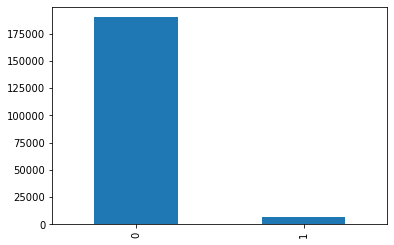

In [ ]:
train.cancer.value_counts().plot(kind="bar")

In [ ]:
train.cancer.value_counts(normalize=True)

0    0.966813
1    0.033187
Name: cancer, dtype: float64

<AxesSubplot:ylabel='cancer'>

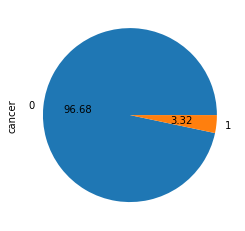

In [ ]:
train.cancer.value_counts().plot.pie(autopct="%.2f")

<AxesSubplot:>

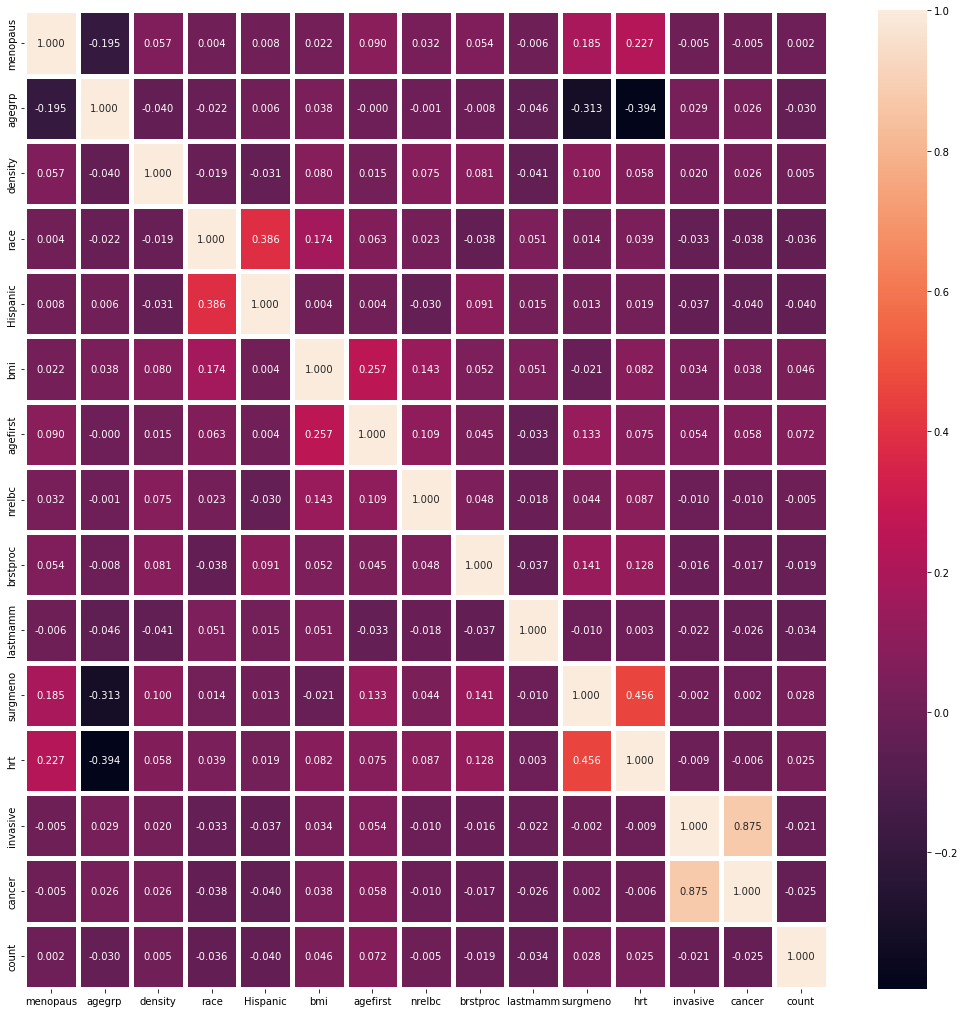

In [ ]:
'''
Use correlation to see which features are correlated.
Remove the high correlated features since they do 
not add any significant information and making 
model complex. 
'''


f,ax = plt.subplots(figsize= (18,18))
sns.heatmap(train.corr(),annot=True,ax=ax,fmt='.3f',linewidths=5)

In [ ]:
'''
One of the pair of the features is removed if the pair has correlation of 1.
'''

trainf=train.drop(["menopaus","surgmeno","hrt","Hispanic","count"],axis=1)



y=trainf["cancer"]
x=trainf.drop(["id","cancer"],axis=1)


In [ ]:
y.value_counts()

0    189942
1      6520
Name: cancer, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
'''
Spling the training data into training and validation dataset to
check the beahvior of the model on unseen validation data
'''

# splitting dataset in train abf val
test_size=0.20
seed=42
xtrain, xVal, ytrain, yVal = train_test_split(x, y, test_size = 0.20,stratify=trainf["cancer"], random_state = 42)

In [ ]:
ytrain.value_counts()

0    151953
1      5216
Name: cancer, dtype: int64

In [ ]:
yVal.value_counts()

0    37989
1     1304
Name: cancer, dtype: int64

In [ ]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xVal)
    te_auc = accuracy_score(predicted, yVal)*100

    Recall = recall_score(predicted, yVal, average = 'micro')
    
    Precision = precision_score(predicted, yVal, average = 'micro')
    
    F1 = f1_score(predicted, yVal, average = 'micro')
    y_pred = cla.predict_proba(xVal)[:, 1]
    roc=roc_auc_score(yVal, y_pred)
    
   # MOC= matthews_corrcoef(predicted , ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, yVal)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    d["AUC_Score"].append(roc)
    #d["MCC SCORE"].append(MOC)
    
    print("**********"*5)
    print()
    return d

In [ ]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 
     'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': [],'AUC_Score':[]}
models = [ [RandomForestClassifier(n_estimators = 350), 'Random Forest'],
          [DecisionTreeClassifier(), 'Decision Tree'], 
          #[LGBMClassifier(device_type = 'gpu'), 'LightGBM']
          [MLPClassifier(max_iter=1000),"MlpClassifer"],

          [CatBoostClassifier(), 'CatBoost'], 
          [GaussianNB(), 'Naive Bayes'],
          [LogisticRegression(), 'Logistic Regression'], 
          #[SVC(), 'Support Vector Machine']
         ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on MlpClassifer model
**************************************************

Working on CatBoost model
Learning rate set to 0.089286
0:	learn: 0.5002701	total: 130ms	remaining: 2m 10s
1:	learn: 0.3652279	total: 179ms	remaining: 1m 29s
2:	learn: 0.2711714	total: 231ms	remaining: 1m 16s
3:	learn: 0.2055474	total: 296ms	remaining: 1m 13s
4:	learn: 0.1597467	total: 363ms	remaining: 1m 12s
5:	learn: 0.1281400	total: 426ms	remaining: 1m 10s
6:	learn: 0.1055226	total: 482ms	remaining: 1m 8s
7:	learn: 0.0897904	total: 538ms	remaining: 1m 6s
8:	learn: 0.0785446	total: 594ms	remaining: 1m 5s
9:	learn: 0.0701208	total: 649ms	remaining: 1m 4s
10:	learn: 0.0636257	total: 703ms	remaining: 1m 3s
11:	learn: 0.0590931	total: 746ms	remaining: 1m 1s
12:	learn: 0.0555996	total: 796ms	remaining: 1m
13:	learn: 0.0527392	total: 848ms	remain

158:	learn: 0.0381738	total: 9.54s	remaining: 50.5s
159:	learn: 0.0381481	total: 9.6s	remaining: 50.4s
160:	learn: 0.0381229	total: 9.66s	remaining: 50.3s
161:	learn: 0.0381113	total: 9.72s	remaining: 50.3s
162:	learn: 0.0380915	total: 9.79s	remaining: 50.3s
163:	learn: 0.0380779	total: 9.85s	remaining: 50.2s
164:	learn: 0.0380555	total: 9.91s	remaining: 50.2s
165:	learn: 0.0380348	total: 9.97s	remaining: 50.1s
166:	learn: 0.0380269	total: 10s	remaining: 50s
167:	learn: 0.0380115	total: 10.1s	remaining: 49.9s
168:	learn: 0.0379922	total: 10.1s	remaining: 49.8s
169:	learn: 0.0379780	total: 10.2s	remaining: 49.8s
170:	learn: 0.0379557	total: 10.2s	remaining: 49.7s
171:	learn: 0.0379373	total: 10.3s	remaining: 49.6s
172:	learn: 0.0379200	total: 10.4s	remaining: 49.5s
173:	learn: 0.0378994	total: 10.4s	remaining: 49.4s
174:	learn: 0.0378847	total: 10.5s	remaining: 49.3s
175:	learn: 0.0378684	total: 10.5s	remaining: 49.2s
176:	learn: 0.0378549	total: 10.6s	remaining: 49.1s
177:	learn: 0.037

318:	learn: 0.0362816	total: 19.6s	remaining: 41.9s
319:	learn: 0.0362766	total: 19.7s	remaining: 41.9s
320:	learn: 0.0362698	total: 19.8s	remaining: 41.8s
321:	learn: 0.0362611	total: 19.9s	remaining: 41.8s
322:	learn: 0.0362572	total: 19.9s	remaining: 41.8s
323:	learn: 0.0362473	total: 20s	remaining: 41.8s
324:	learn: 0.0362393	total: 20.1s	remaining: 41.8s
325:	learn: 0.0362267	total: 20.2s	remaining: 41.8s
326:	learn: 0.0362165	total: 20.3s	remaining: 41.7s
327:	learn: 0.0361988	total: 20.4s	remaining: 41.7s
328:	learn: 0.0361887	total: 20.5s	remaining: 41.7s
329:	learn: 0.0361751	total: 20.5s	remaining: 41.6s
330:	learn: 0.0361640	total: 20.6s	remaining: 41.6s
331:	learn: 0.0361524	total: 20.7s	remaining: 41.6s
332:	learn: 0.0361375	total: 20.7s	remaining: 41.5s
333:	learn: 0.0361327	total: 20.8s	remaining: 41.5s
334:	learn: 0.0361243	total: 20.9s	remaining: 41.4s
335:	learn: 0.0361120	total: 20.9s	remaining: 41.4s
336:	learn: 0.0361039	total: 21s	remaining: 41.3s
337:	learn: 0.03

479:	learn: 0.0351087	total: 31.1s	remaining: 33.6s
480:	learn: 0.0351005	total: 31.1s	remaining: 33.6s
481:	learn: 0.0350909	total: 31.2s	remaining: 33.5s
482:	learn: 0.0350843	total: 31.2s	remaining: 33.4s
483:	learn: 0.0350718	total: 31.3s	remaining: 33.4s
484:	learn: 0.0350669	total: 31.4s	remaining: 33.3s
485:	learn: 0.0350593	total: 31.4s	remaining: 33.3s
486:	learn: 0.0350522	total: 31.5s	remaining: 33.2s
487:	learn: 0.0350470	total: 31.6s	remaining: 33.1s
488:	learn: 0.0350395	total: 31.6s	remaining: 33.1s
489:	learn: 0.0350314	total: 31.7s	remaining: 33s
490:	learn: 0.0350278	total: 31.8s	remaining: 32.9s
491:	learn: 0.0350236	total: 31.8s	remaining: 32.9s
492:	learn: 0.0350212	total: 31.9s	remaining: 32.8s
493:	learn: 0.0350177	total: 32s	remaining: 32.7s
494:	learn: 0.0350155	total: 32s	remaining: 32.7s
495:	learn: 0.0350074	total: 32.1s	remaining: 32.6s
496:	learn: 0.0349984	total: 32.2s	remaining: 32.6s
497:	learn: 0.0349953	total: 32.2s	remaining: 32.5s
498:	learn: 0.0349

640:	learn: 0.0341873	total: 42.1s	remaining: 23.6s
641:	learn: 0.0341819	total: 42.1s	remaining: 23.5s
642:	learn: 0.0341787	total: 42.2s	remaining: 23.4s
643:	learn: 0.0341729	total: 42.3s	remaining: 23.4s
644:	learn: 0.0341711	total: 42.3s	remaining: 23.3s
645:	learn: 0.0341694	total: 42.4s	remaining: 23.2s
646:	learn: 0.0341576	total: 42.4s	remaining: 23.1s
647:	learn: 0.0341538	total: 42.5s	remaining: 23.1s
648:	learn: 0.0341494	total: 42.5s	remaining: 23s
649:	learn: 0.0341423	total: 42.6s	remaining: 22.9s
650:	learn: 0.0341315	total: 42.7s	remaining: 22.9s
651:	learn: 0.0341248	total: 42.7s	remaining: 22.8s
652:	learn: 0.0341140	total: 42.8s	remaining: 22.7s
653:	learn: 0.0341069	total: 42.8s	remaining: 22.7s
654:	learn: 0.0340983	total: 42.9s	remaining: 22.6s
655:	learn: 0.0340949	total: 42.9s	remaining: 22.5s
656:	learn: 0.0340847	total: 43s	remaining: 22.4s
657:	learn: 0.0340805	total: 43.1s	remaining: 22.4s
658:	learn: 0.0340748	total: 43.2s	remaining: 22.3s
659:	learn: 0.03

799:	learn: 0.0334618	total: 53s	remaining: 13.3s
800:	learn: 0.0334598	total: 53.1s	remaining: 13.2s
801:	learn: 0.0334559	total: 53.2s	remaining: 13.1s
802:	learn: 0.0334481	total: 53.2s	remaining: 13.1s
803:	learn: 0.0334400	total: 53.3s	remaining: 13s
804:	learn: 0.0334345	total: 53.3s	remaining: 12.9s
805:	learn: 0.0334290	total: 53.4s	remaining: 12.9s
806:	learn: 0.0334274	total: 53.5s	remaining: 12.8s
807:	learn: 0.0334242	total: 53.5s	remaining: 12.7s
808:	learn: 0.0334194	total: 53.6s	remaining: 12.7s
809:	learn: 0.0334174	total: 53.7s	remaining: 12.6s
810:	learn: 0.0334166	total: 53.7s	remaining: 12.5s
811:	learn: 0.0334133	total: 53.8s	remaining: 12.4s
812:	learn: 0.0334097	total: 53.8s	remaining: 12.4s
813:	learn: 0.0334048	total: 53.9s	remaining: 12.3s
814:	learn: 0.0334032	total: 53.9s	remaining: 12.2s
815:	learn: 0.0334012	total: 54s	remaining: 12.2s
816:	learn: 0.0333954	total: 54s	remaining: 12.1s
817:	learn: 0.0333939	total: 54.1s	remaining: 12s
818:	learn: 0.0333918	

960:	learn: 0.0328488	total: 1m 2s	remaining: 2.53s
961:	learn: 0.0328438	total: 1m 2s	remaining: 2.46s
962:	learn: 0.0328402	total: 1m 2s	remaining: 2.4s
963:	learn: 0.0328350	total: 1m 2s	remaining: 2.33s
964:	learn: 0.0328300	total: 1m 2s	remaining: 2.27s
965:	learn: 0.0328252	total: 1m 2s	remaining: 2.2s
966:	learn: 0.0328228	total: 1m 2s	remaining: 2.14s
967:	learn: 0.0328141	total: 1m 2s	remaining: 2.07s
968:	learn: 0.0328112	total: 1m 2s	remaining: 2.01s
969:	learn: 0.0328092	total: 1m 2s	remaining: 1.94s
970:	learn: 0.0328084	total: 1m 2s	remaining: 1.88s
971:	learn: 0.0328065	total: 1m 2s	remaining: 1.81s
972:	learn: 0.0328034	total: 1m 2s	remaining: 1.75s
973:	learn: 0.0327971	total: 1m 3s	remaining: 1.68s
974:	learn: 0.0327904	total: 1m 3s	remaining: 1.62s
975:	learn: 0.0327862	total: 1m 3s	remaining: 1.55s
976:	learn: 0.0327815	total: 1m 3s	remaining: 1.49s
977:	learn: 0.0327790	total: 1m 3s	remaining: 1.42s
978:	learn: 0.0327744	total: 1m 3s	remaining: 1.36s
979:	learn: 0.

In [ ]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE,AUC_Score
0,Random Forest,99.259396,99.241595,0.992416,0.992416,0.992416,0.007584,0.905579
1,Decision Tree,99.259396,99.213600,0.992136,0.992136,0.992136,0.007864,0.908226
2,MlpClassifer,99.240308,99.249230,0.992492,0.992492,0.992492,0.007508,0.941519
3,CatBoost,99.241581,99.249230,0.992492,0.992492,0.992492,0.007508,0.946084
4,Naive Bayes,99.240308,99.249230,0.992492,0.992492,0.992492,0.007508,0.913993
5,Logistic Regression,99.240308,99.249230,0.992492,0.992492,0.992492,0.007508,0.916019


In [ ]:
# Data Imbalanced
'''Due to data imbalanced let use oversample'''

'Due to data imbalanced let use oversample'

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888) 
X_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)
y_resampled.value_counts() 

0    151953
1    151953
Name: cancer, dtype: int64

In [ ]:

model6 = MLPClassifier(max_iter=1000,random_state=888) 
 
model6.fit(X_resampled, y_resampled) 
y_pred = model6.predict_proba(xVal)[:, 1] 

from sklearn.metrics import roc_auc_score 
roc_auc_score(yVal, y_pred)

0.9436644822274192

In [ ]:
# make predictions on test set for

testf=test.drop(["id","menopaus","surgmeno","hrt","Hispanic","count"],axis=1)
X_test=testf.values

output_prediction=model6.predict(X_test)

In [ ]:
#to check the equality
print(len(output_prediction),len(X_test))


28066 28066


In [ ]:
data={"id":test["id"],"prediction":output_prediction}


In [ ]:
solution = pd.DataFrame(data = data)

In [ ]:
solution.head()

,id,prediction
0,RE-PROV-0000001,0
1,RE-PROV-0000002,0
2,RE-PROV-0000003,0
3,RE-PROV-0000004,0
4,RE-PROV-0000005,0


In [ ]:
import os
data_dir="C:/Users/Dell/Documents/Topcooder/cancer/"
solution.to_csv('solution.csv', index=False)